In [10]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Distribution of outdegree

In [5]:
G = ox.graph_from_xml('./data/Porto_driving.osm')


In [30]:
G.number_of_nodes()

5229

In [31]:
G.number_of_edges()

18716

Text(0.5, 1.0, 'Distribution of out degree')

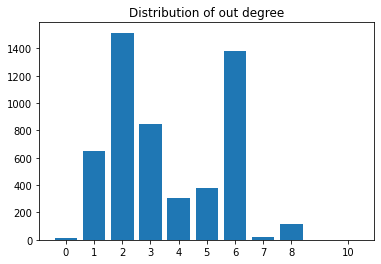

In [15]:
out_degrees = np.asarray(list(map(lambda x: len(G.out_edges(x)), G.nodes)))

unique, counts = np.unique(out_degrees, return_counts=True)

plt.bar(unique, counts)
plt.xticks(unique)
plt.title('Distribution of out degree')

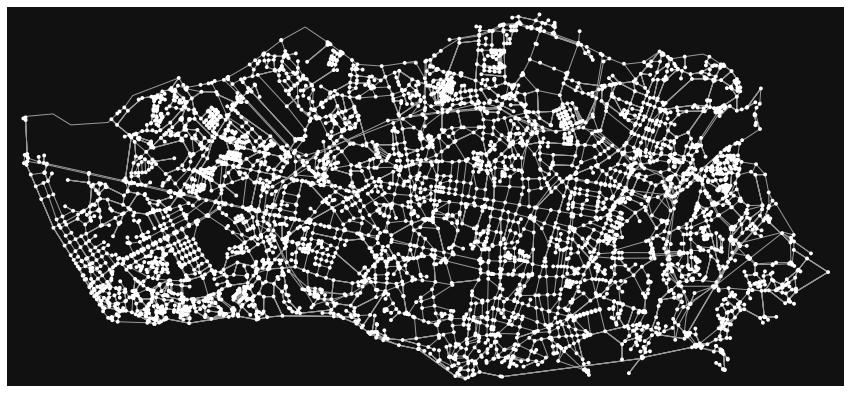

(<Figure size 1080x1080 with 1 Axes>, <AxesSubplot:>)

In [17]:
ox.plot.plot_graph(G, figsize=(15,15))

In [9]:
max(list(map(lambda x: len(G.in_edges(x)), G.nodes)))


10

In [22]:
len(G.nodes)

5229

In [29]:
sum(list(map(lambda x: int(len(G.in_edges(x)) == 1), G.nodes))), list(G.edges)[2]


(640, (25503951, 1243857957, 0))

Fraction of trips with finished true in the middle

In [35]:
from definitions import ROOT_DIR
from csv import reader as csv_reader

processed_trip_path = f"{ROOT_DIR}/../Downloads/processed_trips.csv"
with open(processed_trip_path, 'r') as f:
    reader = csv_reader(f)
    cnt_trips = 0
    trip_id = 0
    all_trips = []
    check = False
    for i,row in enumerate(reader):
        # if check:
        #     cnt_trips+= trip_id == row[4]
        #     check = False

        if row[2][0] == 'T':
            trip_id = row[4]
            if not len(all_trips):
                check = True
                all_trips.append(trip_id)
            else:
                if all_trips[-1] != trip_id:
                    check = True
                    all_trips.append(trip_id)
                else:
                    if check:
                        cnt_trips+=1
                        check = False



print(cnt_trips, len(all_trips))




418231 1466191


In [36]:
cnt_trips/len(all_trips)

0.2852500117651793

In [43]:
len(all_trips) - cnt_trips

1047960

Number of trips that finish in the final target

In [47]:
with open(processed_trip_path, 'r') as f:
    reader = csv_reader(f)
    cnt_all_trips = 1
    prev_id = 0
    
    check = False
    for i,row in enumerate(reader):
        trip_id = row[4]
        if prev_id != trip_id:
            cnt_all_trips+=1
            prev_id = trip_id
            


In [48]:
len(all_trips), cnt_all_trips

(1466191, 1466193)